# Sentiment Distribution Analysis
Analyze and visualize the distribution of sentiments in the dataset using histograms and pie charts.

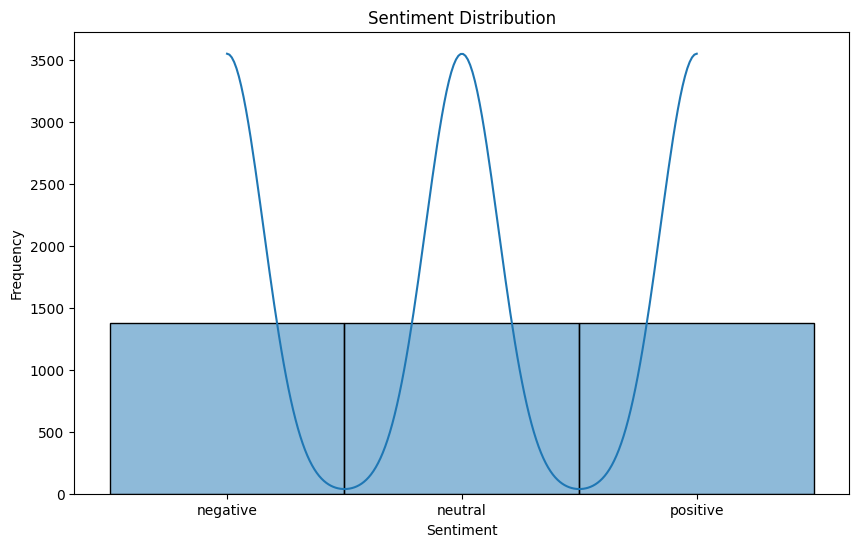

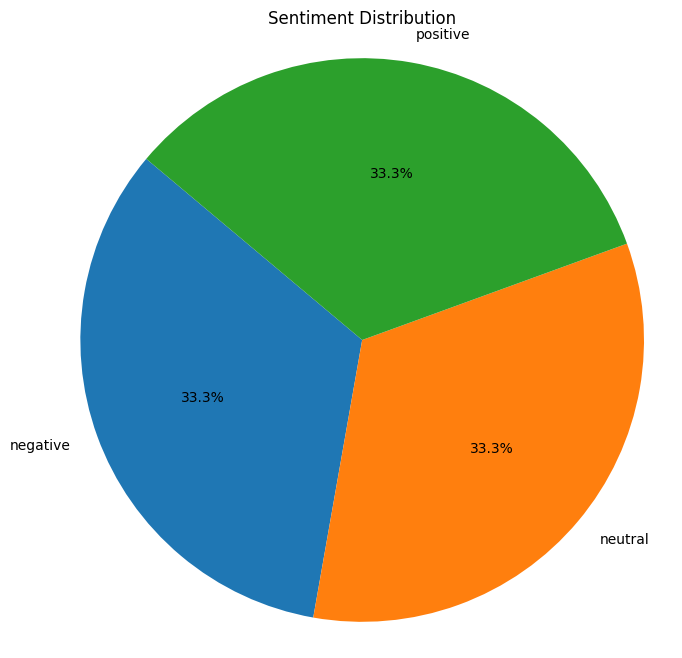

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the dataset is in a CSV file named 'filtered_data.csv'
data = pd.read_csv('filtered_reviews.csv')

# Display the first few rows of the dataset
data.head()

# Sentiment Distribution Analysis
# Plotting the distribution of sentiments using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], kde=True, bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of sentiments using a pie chart
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Word Cloud Generation
Create word clouds for different sentiment categories to visualize frequently occurring terms.

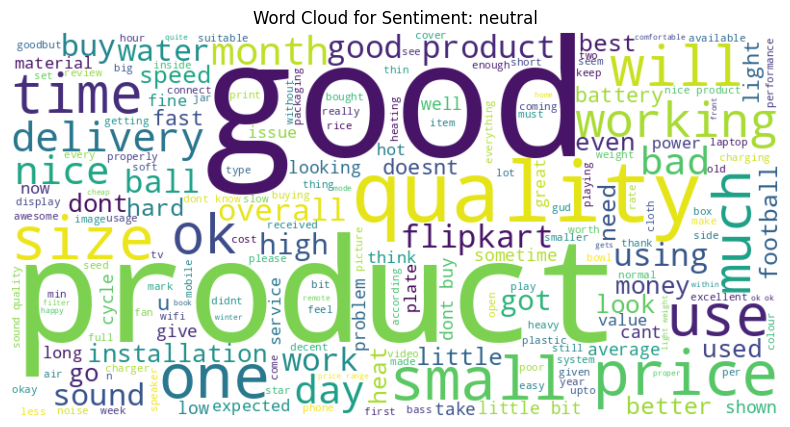

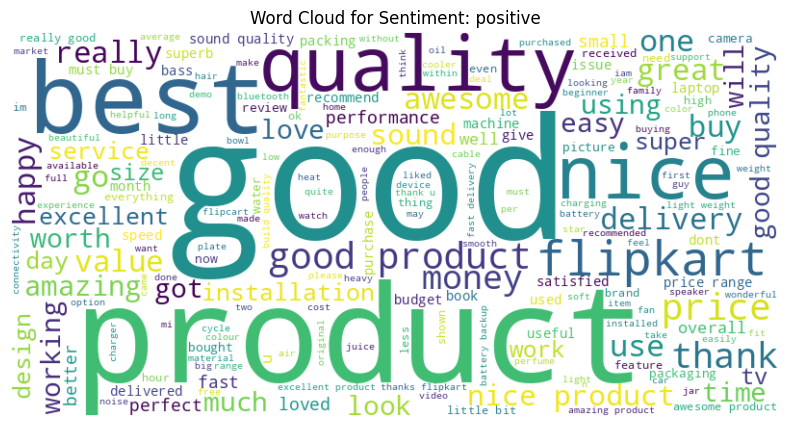

In [2]:
# Import additional necessary libraries for word cloud generation
from wordcloud import WordCloud

# Function to generate word cloud for a specific sentiment
def generate_word_cloud(data, sentiment):
    # Filter data for the specific sentiment
    sentiment_data = data[data['Sentiment'] == sentiment]
    
    # Combine all the text data for the specific sentiment
    text = ' '.join(sentiment_data['Summary'].astype(str))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment: {sentiment}')
    plt.axis('off')
    plt.show()

# Generate word clouds for different sentiment categories
for sentiment in data['Sentiment'].unique():
    generate_word_cloud(data, sentiment)

# TF-IDF Analysis
Perform TF-IDF vectorization on the text data and analyze term importance across documents.

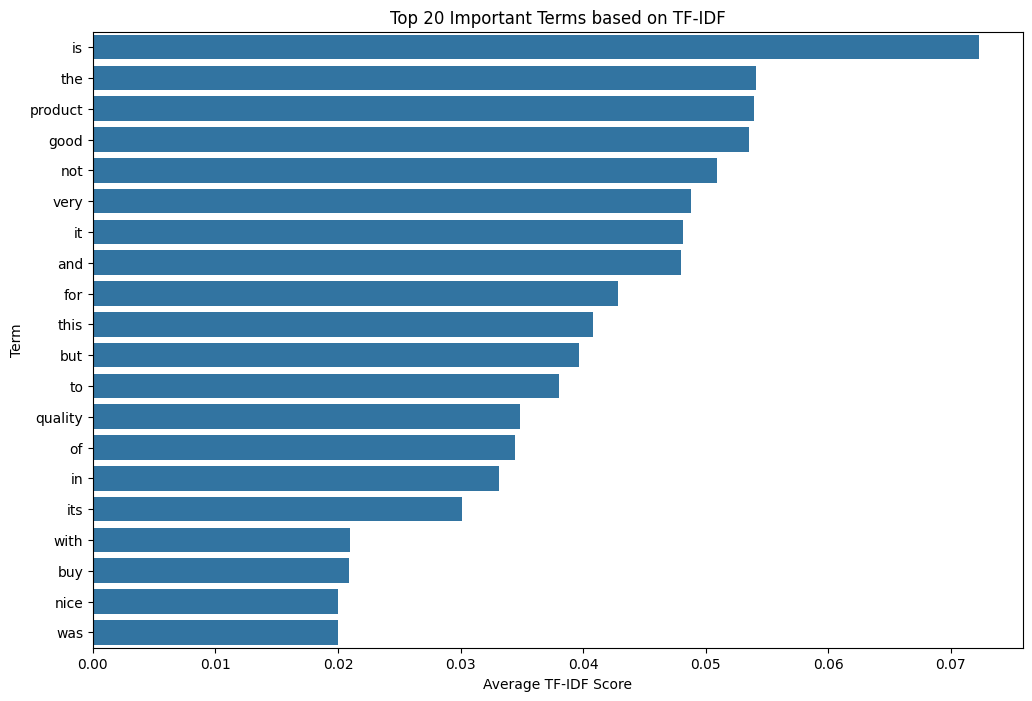

In [3]:
# Import necessary libraries for TF-IDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform TF-IDF vectorization on the 'summary' column
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Summary'].astype(str))

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

# Analyze term importance by averaging TF-IDF scores across all documents
term_importance = tfidf_df.mean().sort_values(ascending=False)

# Plot the top 20 important terms
plt.figure(figsize=(12, 8))
sns.barplot(x=term_importance[:20], y=term_importance.index[:20])
plt.title('Top 20 Important Terms based on TF-IDF')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Term')
plt.show()

# Sentiment Keywords Analysis
Extract and analyze key words associated with each sentiment category.

In [4]:
# Import necessary libraries for keyword extraction
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract keywords for each sentiment
def extract_keywords(data, sentiment, n_keywords=10):
    # Filter data for the specific sentiment
    sentiment_data = data[data['Sentiment'] == sentiment]
    
    # Combine all the text data for the specific sentiment
    text = ' '.join(sentiment_data['Summary'].astype(str))
    
    # Use CountVectorizer to get term frequencies
    vectorizer = CountVectorizer(max_features=n_keywords, stop_words='english')
    term_matrix = vectorizer.fit_transform([text])
    
    # Get the terms and their frequencies
    terms = vectorizer.get_feature_names_out()
    frequencies = term_matrix.toarray().flatten()
    
    # Create a DataFrame for better readability
    keywords_df = pd.DataFrame({'term': terms, 'frequency': frequencies})
    
    return keywords_df.sort_values(by='frequency', ascending=False)

# Extract and display keywords for each sentiment category
for sentiment in data['Sentiment'].unique():
    keywords_df = extract_keywords(data, sentiment)
    print(f'Keywords for Sentiment: {sentiment}')
    print(keywords_df)
    print('\n')

Keywords for Sentiment: negative
      term  frequency
5  product        606
6  quality        296
3     good        286
2     dont        262
0      bad        259
1      buy        244
8  working        193
4    money        167
9    worst        146
7    waste        145


Keywords for Sentiment: neutral
      term  frequency
1     good        535
5  product        430
6  quality        240
4    price        111
3       ok        100
0     dont         90
8    small         90
7     size         89
2     nice         81
9      use         76


Keywords for Sentiment: positive
       term  frequency
4      good        812
8   product        668
9   quality        295
6      nice        240
1      best        199
3  flipkart        175
7     price        174
5     money        111
0   awesome        107
2  delivery        107




# Sentiment vs Rating Correlation
Explore the relationship between sentiment scores and ratings using correlation analysis and visualizations.

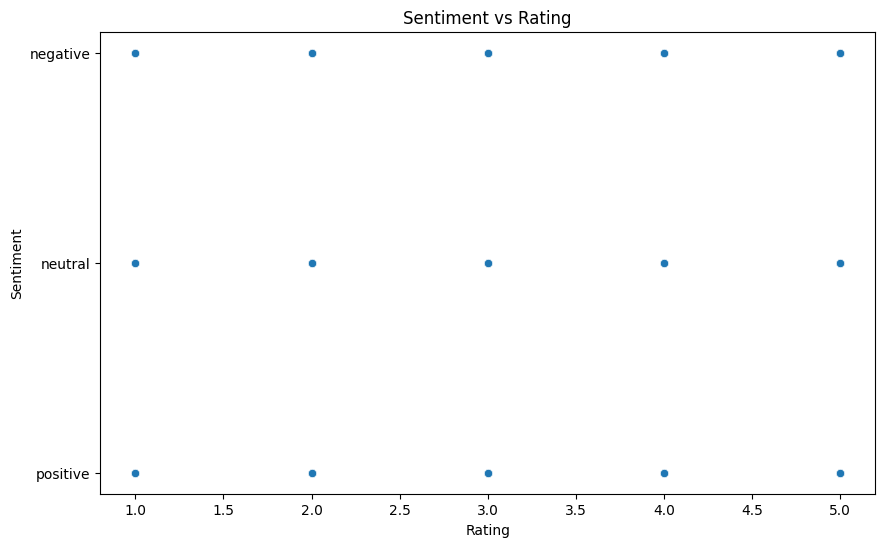

In [5]:
# Sentiment vs Rating Correlation

# Calculate the correlation between sentiment scores and ratings

# correlation = data['Sentiment'].corr(data['Rate'])

# Print the correlation value
# print(f'Correlation between Sentiment and Rating: {correlation}')

# Plot the relationship between sentiment scores and ratings using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Rate'], y=data['Sentiment'])
plt.title('Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()

# Plot the relationship using a box plot to observe the distribution of sentiments for each rating
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['Rate'], y=data['Sentiment'])
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()

# Comment Length vs Sentiment
Analyze how comment length correlates with sentiment categories using box plots and statistical tests.

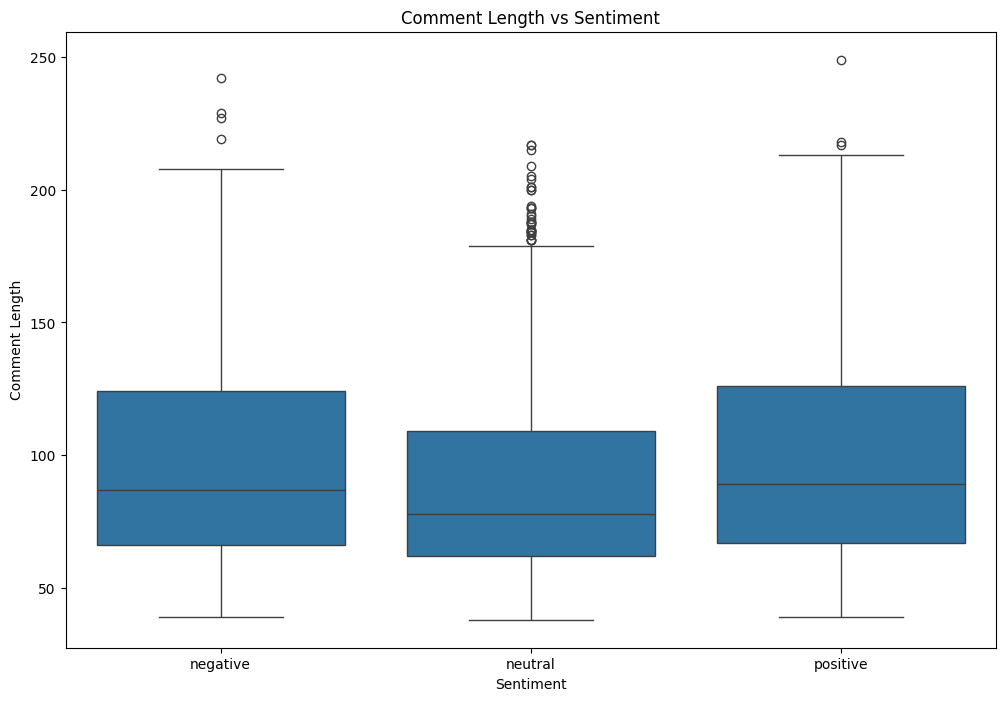

Kruskal-Wallis H-test result: H-statistic = 57.71038991741178, p-value = 2.9400049064704685e-13


In [6]:
# Comment Length vs Sentiment

# Calculate the length of each comment
data['comment_length'] = data['Summary'].astype(str).apply(len)

# Plot the distribution of comment lengths for each sentiment using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment', y='comment_length', data=data)
plt.title('Comment Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()

# Perform statistical tests to analyze the correlation between comment length and sentiment
from scipy.stats import kruskal

# Group data by sentiment
grouped_data = [data[data['Sentiment'] == sentiment]['comment_length'] for sentiment in data['Sentiment'].unique()]

# Perform Kruskal-Wallis H-test
stat, p = kruskal(*grouped_data)

# Print the test results
print(f'Kruskal-Wallis H-test result: H-statistic = {stat}, p-value = {p}')

# Confusion Matrix Evaluation
Create and analyze confusion matrix to evaluate sentiment classification performance.

In [7]:
# Import necessary libraries for confusion matrix evaluation


# Feature Importance Analysis
Identify and visualize the most important features for sentiment classification.

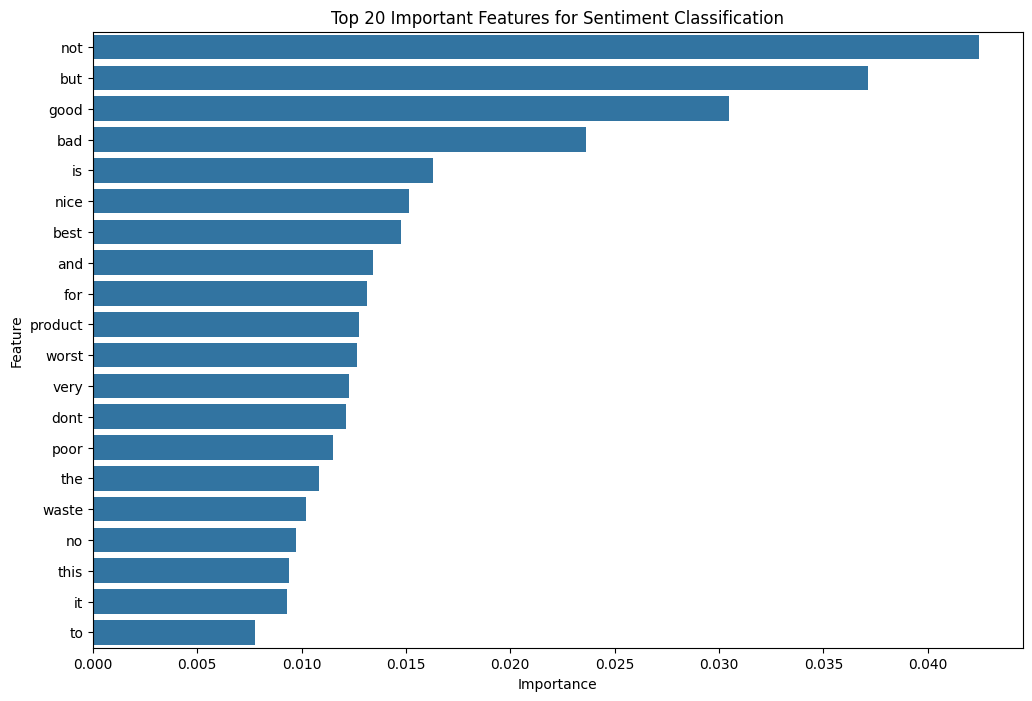

KeyError: 'predicted_sentiment'

In [8]:
# Import necessary libraries for feature importance analysis
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'predicted_sentiment' column contains the predicted sentiment values
# and 'sentiment' column contains the true sentiment values


# Assuming 'summary' is the feature and 'sentiment' is the target variable
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Summary'].astype(str))
y = data['Sentiment']

# Train a RandomForestClassifier to determine feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better readability
features_df = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='importance', ascending=False)

# Display the top 20 important features
top_features = features_df.head(20)

# Plot the top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features['importance'], y=top_features['feature'])
plt.title('Top 20 Important Features for Sentiment Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(data['Sentiment'], data['predicted_sentiment'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['Sentiment'].unique())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('filtered_reviews.csv')

# 准备特征和目标变量
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Summary'].astype(str))
y = data['Sentiment']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 进行预测
y_pred = rf_classifier.predict(X_test)

# 获取特征重要性
feature_importances = rf_classifier.feature_importances_

# 创建特征重要性DataFrame
features_df = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': feature_importances
})

# 按重要性排序
features_df = features_df.sort_values(by='importance', ascending=False)

# 显示前20个重要特征
plt.figure(figsize=(12, 8))
top_features = features_df.head(20)
sns.barplot(x=top_features['importance'], y=top_features['feature'])
plt.title('Top 20 Important Features for Sentiment Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['Sentiment'].unique())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 打印分类报告
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

<Figure size 1000x800 with 0 Axes>


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.71      0.75       298
     neutral       0.59      0.70      0.64       266
    positive       0.78      0.71      0.74       261

    accuracy                           0.71       825
   macro avg       0.72      0.71      0.71       825
weighted avg       0.72      0.71      0.71       825



# TSNE Visualization
Apply t-SNE dimensionality reduction to visualize sentiment clusters in 2D space.

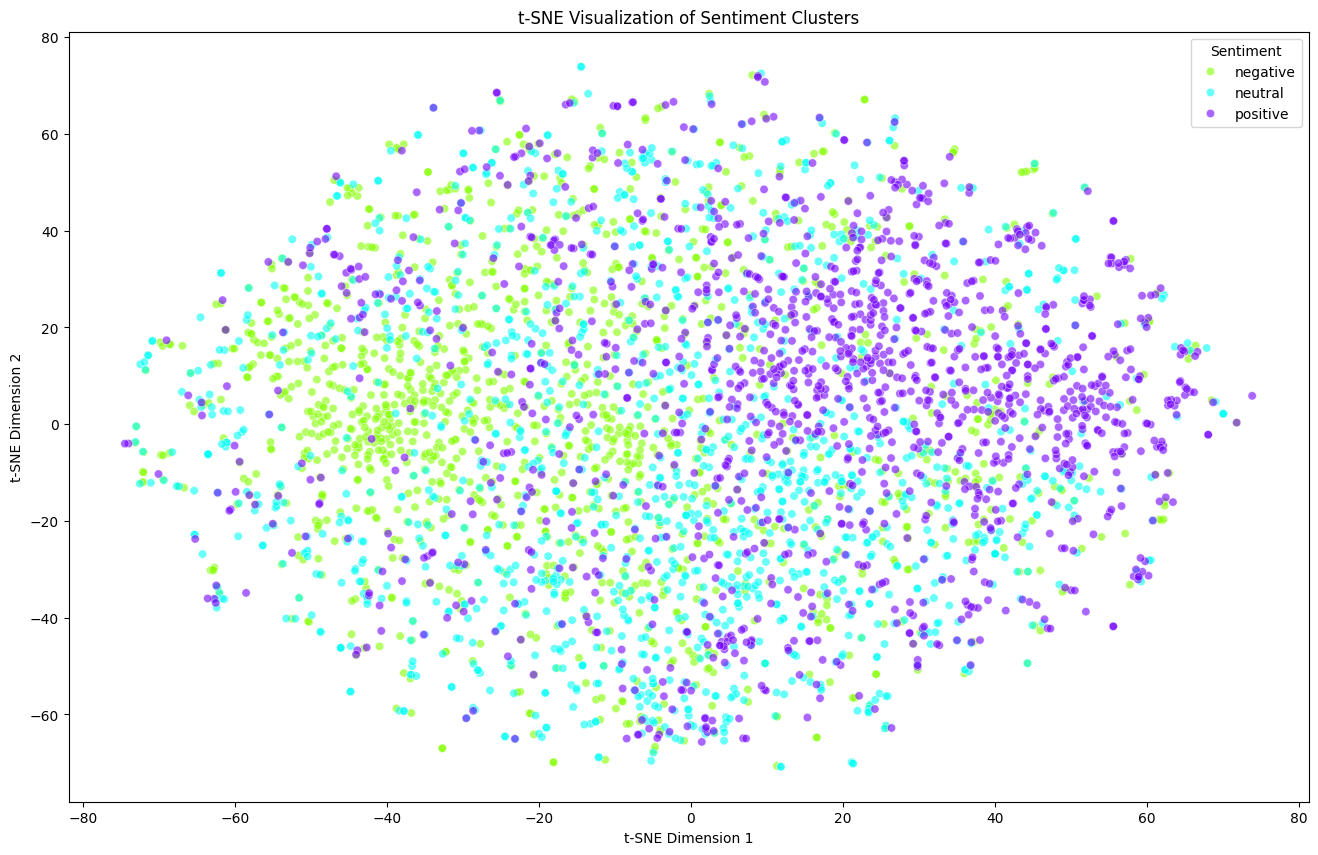

In [11]:
# Import necessary libraries for t-SNE visualization
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Add t-SNE results to the dataframe
data['tsne-2d-one'] = tsne_results[:, 0]
data['tsne-2d-two'] = tsne_results[:, 1]

# Plot the t-SNE results
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Sentiment',
    palette=sns.color_palette('hsv', len(data['Sentiment'].unique())),
    data=data,
    legend='full',
    alpha=0.6
)
plt.title('t-SNE Visualization of Sentiment Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

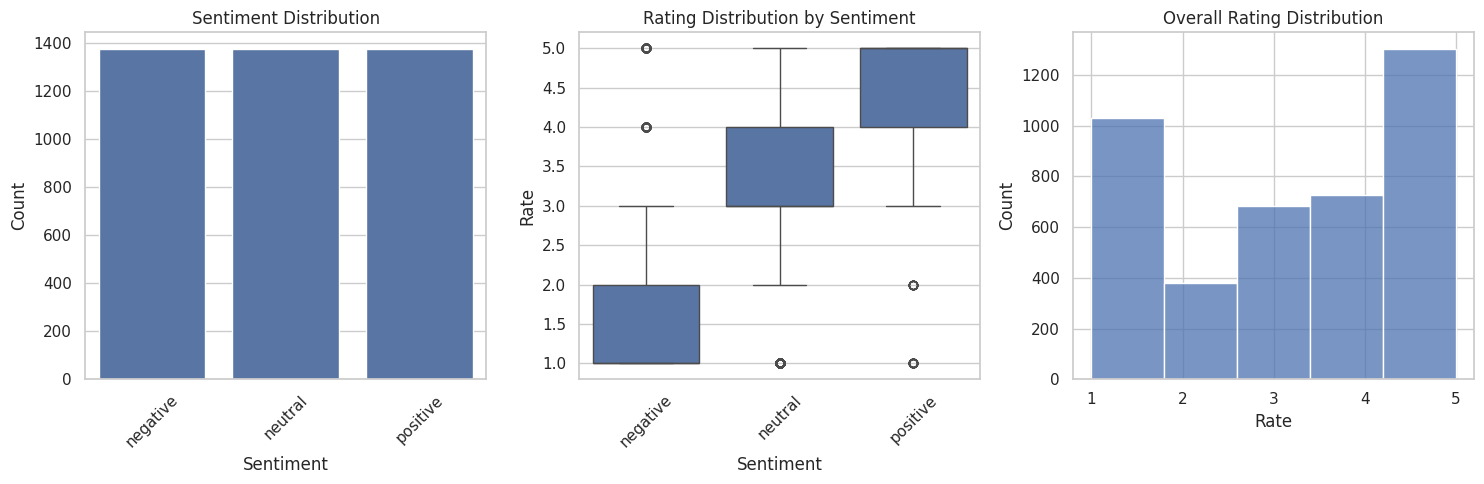

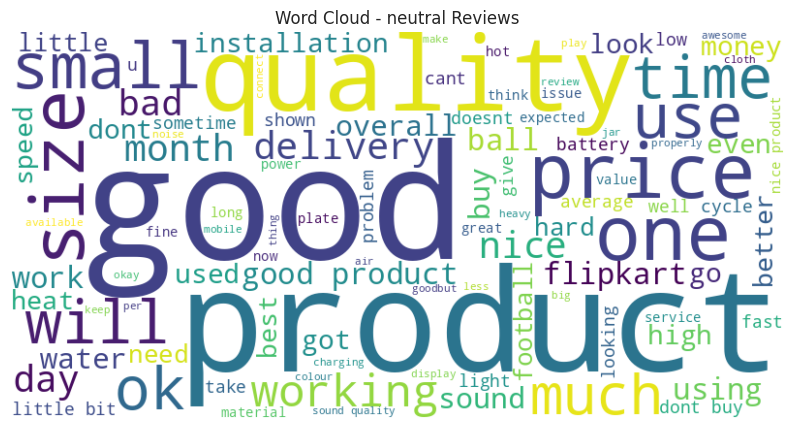


=== Sentiment Analysis Summary ===

Sentiment Distribution:
Sentiment
negative    0.333
neutral     0.333
positive    0.333
Name: proportion, dtype: float64

Average Rating by Sentiment:
Sentiment
negative    1.80
neutral     3.28
positive    4.57
Name: Rate, dtype: float64

Review Length Statistics by Sentiment:
            count   mean    std   min    25%   50%    75%    max
Sentiment                                                       
negative   1374.0  98.25  39.61  39.0  66.25  87.0  124.0  242.0
neutral    1374.0  89.21  36.35  38.0  62.00  78.0  109.0  217.0
positive   1374.0  98.76  39.27  39.0  67.00  89.0  126.0  249.0
An error occurred during analysis: 'Series' object has no attribute 'nonzero'


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the style configurations
plt.style.use('default')
sns.set_theme(style="whitegrid")

# 1. Load and prepare data
try:
    df = pd.read_csv('filtered_reviews.csv')
except FileNotFoundError:
    print("Error: filtered_reviews.csv not found in the current directory")
    raise

def analyze_sentiment_data(df):
    """Analyze sentiment data and generate visualizations"""
    
    # 2.1 Sentiment Distribution
    fig = plt.figure(figsize=(15, 5))
    
    # First subplot - Sentiment Distribution
    plt.subplot(1, 3, 1)
    sentiment_dist = df['Sentiment'].value_counts()
    sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
    plt.title('Sentiment Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Second subplot - Rating by Sentiment
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Sentiment', y='Rate', data=df)
    plt.title('Rating Distribution by Sentiment')
    plt.xticks(rotation=45)
    
    # Third subplot - Rating Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(data=df, x='Rate', bins=5)
    plt.title('Overall Rating Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # 2.2 Word Cloud Analysis
    def create_wordcloud(text, title):
        try:
            # Convert all text to string and join
            text_str = ' '.join([str(t) for t in text if pd.notna(t)])
            if not text_str.strip():  # Check if text is empty
                print(f"Warning: No text available for {title}")
                return
                
            wordcloud = WordCloud(
                width=800, 
                height=400,
                background_color='white',
                min_font_size=10,
                max_words=100
            ).generate(text_str)
            
            plt.figure(figsize=(10, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            plt.show()
        except Exception as e:
            print(f"Error generating wordcloud for {title}: {str(e)}")
    
    # Generate word clouds for each sentiment
    for sentiment in df['Sentiment'].unique():
        text = df[df['Sentiment'] == sentiment]['Summary']
        create_wordcloud(text, f'Word Cloud - {sentiment} Reviews')
    
    # 2.3 Print Key Metrics
    print("\n=== Sentiment Analysis Summary ===")
    print("\nSentiment Distribution:")
    print(df['Sentiment'].value_counts(normalize=True).round(3))
    
    print("\nAverage Rating by Sentiment:")
    print(df.groupby('Sentiment')['Rate'].mean().round(2))
    
    # Add review length analysis
    df['Summary_Length'] = df['Summary'].astype(str).str.len()
    print("\nReview Length Statistics by Sentiment:")
    print(df.groupby('Sentiment')['Summary_Length'].describe().round(2))
    
    # 2.4 TF-IDF Analysis
    tfidf = TfidfVectorizer(max_features=100, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['Summary'].astype(str))
    
    def get_top_terms(sentiment):
        mask = df['Sentiment'] == sentiment
        if mask.any():
            sentiment_tfidf = tfidf_matrix[mask]
            avg_tfidf = sentiment_tfidf.mean(axis=0).A1
            top_indices = avg_tfidf.argsort()[-10:][::-1]
            return pd.DataFrame({
                'term': tfidf.get_feature_names_out()[top_indices],
                'score': avg_tfidf[top_indices]
            })
        return pd.DataFrame()
    
    # Plot top terms for each sentiment
    for sentiment in df['Sentiment'].unique():
        top_terms = get_top_terms(sentiment)
        if not top_terms.empty:
            plt.figure(figsize=(10, 5))
            sns.barplot(data=top_terms, x='score', y='term')
            plt.title(f'Top Terms - {sentiment} Reviews')
            plt.tight_layout()
            plt.show()

# Run the analysis
try:
    analyze_sentiment_data(df)
except Exception as e:
    print(f"An error occurred during analysis: {str(e)}")


Generating word clouds...



Performing TF-IDF analysis...


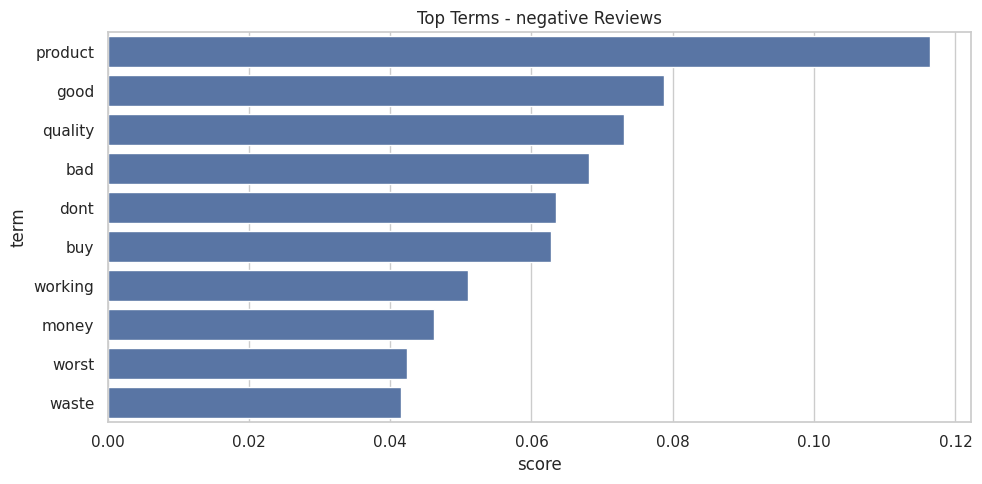

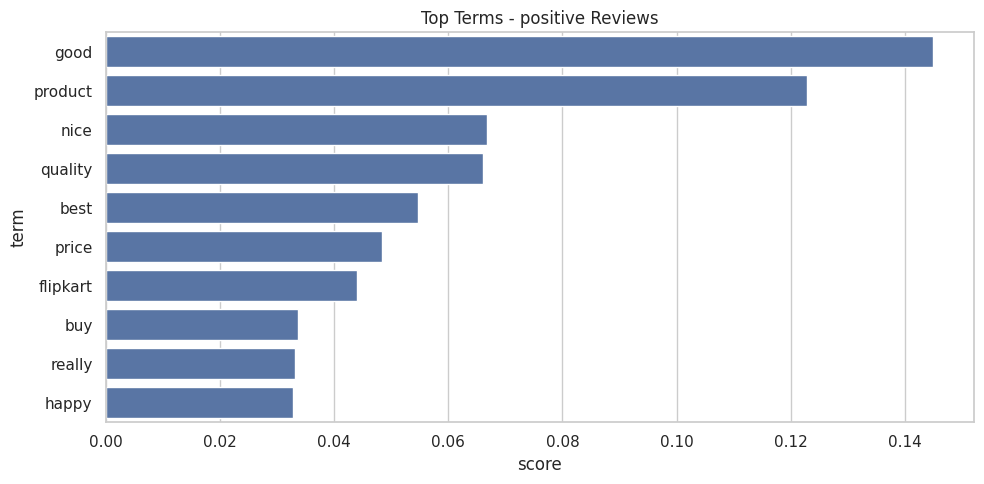

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Update the create_wordcloud function
def create_wordcloud(text_series, title):
    """Generate word cloud from text series"""
    try:
        # Convert series to list of strings and filter None values
        text_list = [str(t) for t in text_series if pd.notna(t)]
        if not text_list:
            print(f"Warning: No valid text available for {title}")
            return
            
        # Join all texts
        text_combined = ' '.join(text_list)
        
        wordcloud = WordCloud(
            width=800, 
            height=400,
            background_color='white',
            min_font_size=10,
            max_words=100
        ).generate(text_combined)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    except Exception as e:
        print(f"Error generating wordcloud for {title}: {str(e)}")

# Update the TF-IDF analysis function
def analyze_tfidf(df, sentiment):
    """Analyze TF-IDF for a specific sentiment"""
    try:
        # Filter data for the sentiment
        sentiment_data = df[df['Sentiment'] == sentiment]
        
        # Create and fit TF-IDF
        tfidf = TfidfVectorizer(max_features=100, stop_words='english')
        tfidf_matrix = tfidf.fit_transform(sentiment_data['Summary'].astype(str))
        
        # Get feature names and scores
        feature_names = tfidf.get_feature_names_out()
        scores = tfidf_matrix.mean(axis=0).A1
        
        # Create DataFrame with results
        results = pd.DataFrame({
            'term': feature_names,
            'score': scores
        }).sort_values('score', ascending=False).head(10)
        
        return results
    except Exception as e:
        print(f"Error in TF-IDF analysis for {sentiment}: {str(e)}")
        return pd.DataFrame()

# Update the main analysis function
def analyze_sentiment_data(df):
    """Main analysis function"""
    # ... existing visualization code ...
    
    # Updated word cloud generation
    print("\nGenerating word clouds...")
    for sentiment in df['Sentiment'].unique():
        text = df[df['Sentiment'] == sentiment]['Summary']
        create_wordcloud(text, f'Word Cloud - {sentiment} Reviews')
    
    # Updated TF-IDF analysis
    print("\nPerforming TF-IDF analysis...")
    for sentiment in df['Sentiment'].unique():
        top_terms = analyze_tfidf(df, sentiment)
        if not top_terms.empty:
            plt.figure(figsize=(10, 5))
            sns.barplot(data=top_terms, x='score', y='term')
            plt.title(f'Top Terms - {sentiment} Reviews')
            plt.tight_layout()
            plt.show()

# Run the analysis
try:
    analyze_sentiment_data(df)
except Exception as e:
    print(f"An error occurred during analysis: {str(e)}")